# Import Libraries

In [25]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

keras.backend.set_image_data_format('channels_last')

## Load the Data



In [45]:
mnist_train = pd.read_csv('train.csv')
mnist_test = pd.read_csv('test.csv')

display(" train data",mnist_train )
display(" train data",mnist_test )


' train data'

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


' train data'

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Get train and test data

In [47]:
# Convert to trian and test data; Preserve original dataset
X_train = mnist_train.drop('label', axis=1).copy()
X_test = mnist_test.copy()
Y_train = mnist_train['label'].copy()

In [48]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [49]:
# Normalize values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [51]:
# Reshape to 28 x 28 so that we can see the image ie. handwritten number
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

##  Display images

To check whether everything worked as expected, let's take a look at a few images from each folder.

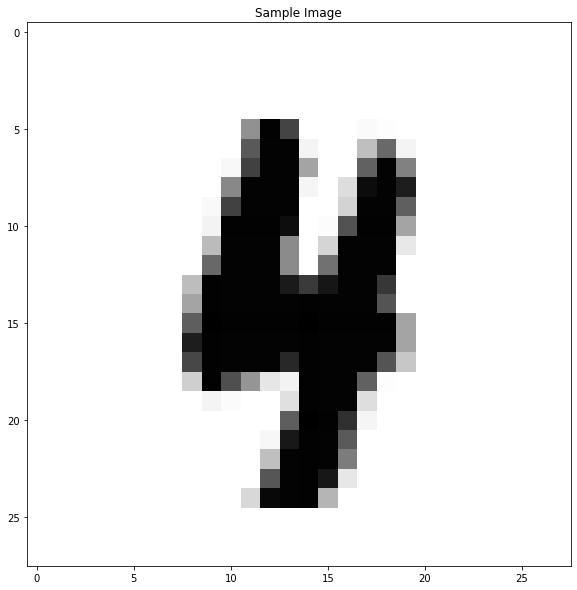

In [52]:

import random
no_images=len(X_train)

# Display random Image
fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(X_train[random.randint(0,no_images), :, :, 0], cmap='Greys', interpolation='nearest') 

# replace random.randint(0,no_images) in code above with a number if you want to see specific image. 
#This dispalys a random image each time

plt.title("Sample Image")
plt.show()

Here 1 is black and 0 is white....after normalization

Smaller size helps us visualise better?

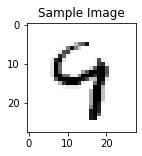

In [53]:

# Display random Image
fig, ax = plt.subplots(figsize=(2,2)) # now fix size is 2 x 2

plt.imshow(X_train[random.randint(0,no_images), :, :, 0], cmap='Greys', interpolation='nearest')
plt.title("Sample Image")
plt.show()

In [54]:
# Split between train and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [55]:
# Get one hot encoding
Y_train = keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = keras.utils.to_categorical(Y_val, num_classes=10)

In [58]:
# Build CNN Model
def CNN():
    model = keras.Sequential()
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1,padding='valid',input_shape=(28, 28, 1),activation='relu'))
    model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1,padding='same',activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
    model.add(layers.Dropout(0.2))
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='valid'))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid'))
    model.add(layers.Dropout(0.2))
    # FLATTEN > DENSE > CLASSIFICATION
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [59]:
model = CNN()

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)       

## Training and Prediction

We will train the model for 50 epochs, with a batch size of 64.

In [63]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=20, verbose=1)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 132s 4ms/sample - loss: 0.0816 - accuracy: 0.9751 - val_loss: 0.0696 - val_accuracy: 0.9787
Epoch 2/20
33600/33600 [==============================] - 155s 5ms/sample - loss: 0.0548 - accuracy: 0.9826 - val_loss: 0.0430 - val_accuracy: 0.9865
Epoch 3/20
33600/33600 [==============================] - 130s 4ms/sample - loss: 0.0426 - accuracy: 0.9862 - val_loss: 0.0829 - val_accuracy: 0.9758
Epoch 4/20
33600/33600 [==============================] - 152s 5ms/sample - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.0424 - val_accuracy: 0.9862
Epoch 5/20
33600/33600 [==============================] - 137s 4ms/sample - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.0366 - val_accuracy: 0.9888
Epoch 6/20
33600/33600 [==============================] - 150s 4ms/sample - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0468 - val_accuracy: 0.9864
Epoch 7/20
33600/33600 [===========================

You can make verbose=0, in the code above if you dod not  want to see each step in the process

### Predictions

Below is a function to help see whether we have trained the model properly. "imgs" is a parameter to see the first x number of images in our test dataset.

In [65]:
def predict(model, X, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

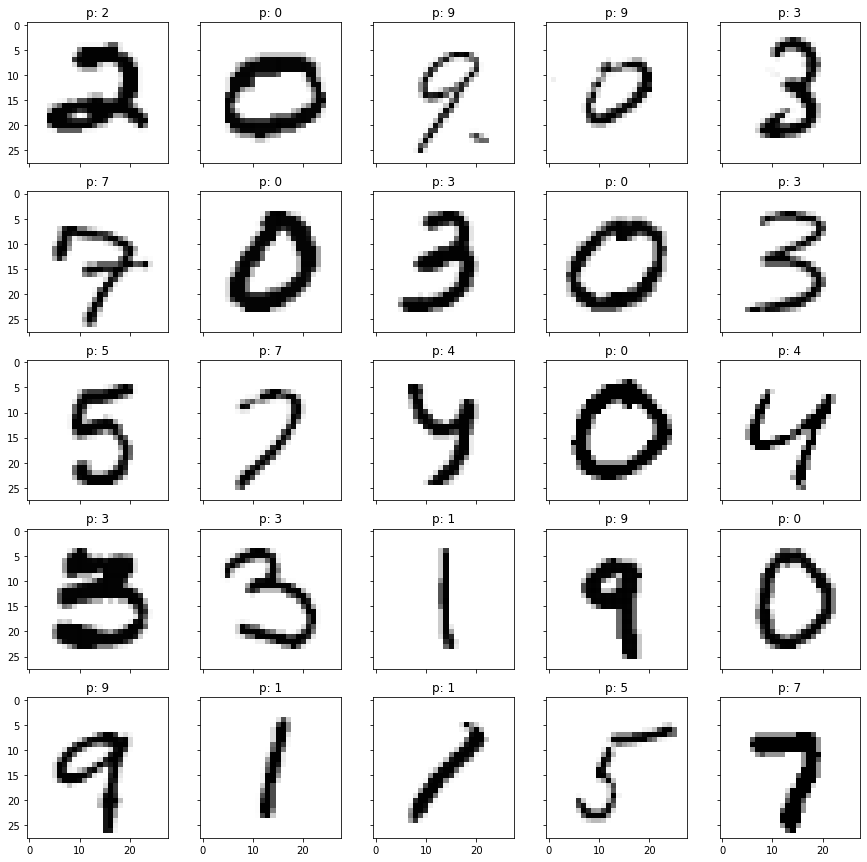

In [66]:
predict(model, X_test, 25)

## Submission

We create the full prediction and place the predictions into the requested format.

In [67]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [73]:
y_pred = pd.Series(y_pred, name='Label')
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)
sub.to_csv('digit_cnn.csv', index=False)

# Acknowledgement, Sources and Suggestions




kernel by Chris: https://www.kaggle.com/christianwallenwein/beginners-guide-to-mnist-with-fast-ai

kernel by Timothy: https://www.kaggle.com/susantotm/digit-recognizer

kernel by Yassine: https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6


